In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [145]:
df = pd.read_csv(r'your/path.csv')

In [146]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [147]:
df.shape

(891, 12)

In [148]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [149]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [150]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [151]:
df.duplicated().sum()

0

In [152]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Handling Null Values**

****filling the null values with the mean (average) of values in Age column****

In [153]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [154]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

*****Droping the Cabin Column as it has excessive amount of Null values*****

In [155]:
df=df.drop('Cabin',axis=1)

In [156]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

*****let's handle the null values in Embarked column*****

In [157]:
df['Embarked'] = df['Embarked'].bfill()

In [158]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

***Encoding the Categorical Data***

In [159]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [160]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [161]:
df['Sex'] = le.fit_transform(df["Sex"])

*****Let's separate input and output columns for prediction*****

In [162]:
x = df[['Pclass', 'Sex', 'Age']]
y = df['Survived']

In [163]:
# Checking vaue counts in y 
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

### EDA

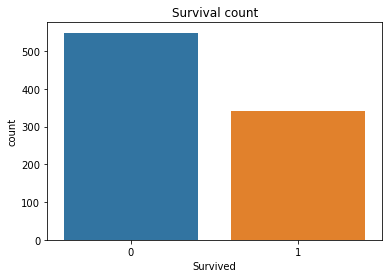

In [164]:
# Plotting survival count 

plt.title('Survival count')
sns.countplot(x = y);

1    577
0    314
Name: Sex, dtype: int64


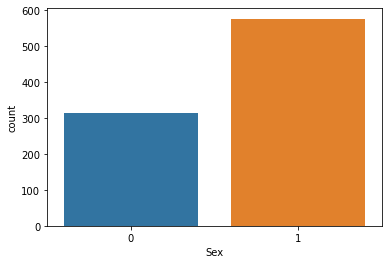

In [165]:
#let's Visualize the Total count of Gender
print(df['Sex'].value_counts())
sns.countplot(x = df['Sex']); # [male = 0, female = 1]

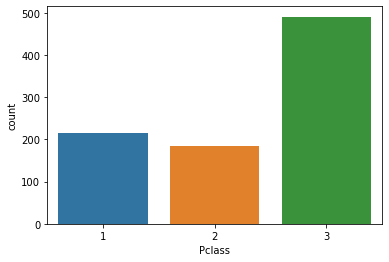

In [166]:
# let's Visualize the Pclass column
sns.countplot(x = df['Pclass']);

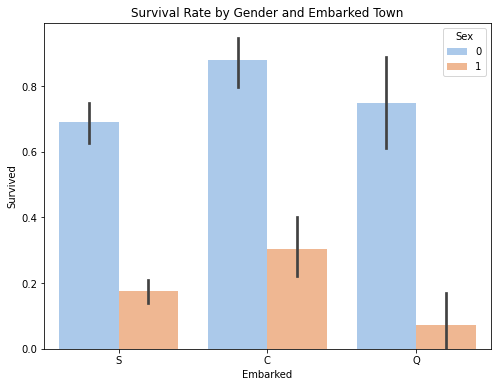

In [167]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=df, palette="pastel")
plt.title("Survival Rate by Gender and Embarked Town")
plt.show()

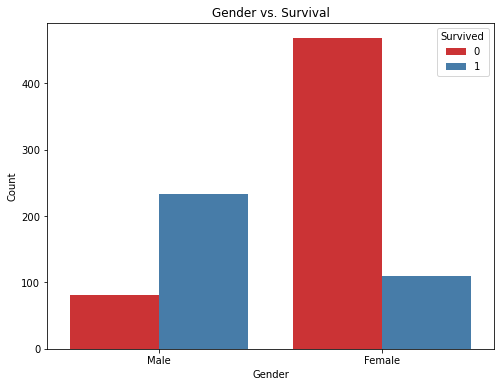

In [168]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Sex", hue="Survived", palette="Set1")
plt.title("Gender vs. Survival")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks([0, 1], ["Male", "Female"])
plt.show()

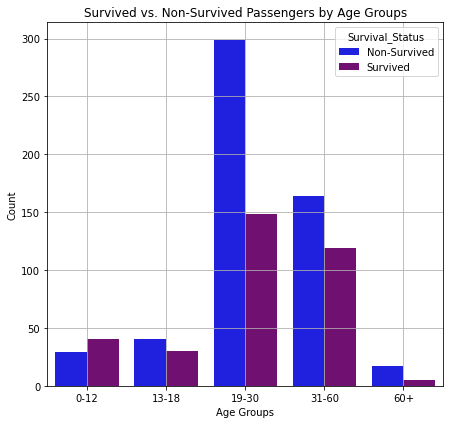

In [169]:
df["Survival_Status"] = df["Survived"].map({0: "Non-Survived", 1: "Survived"})

bins = [0, 12, 18, 30, 60, 100]
labels = ["0-12", "13-18", "19-30", "31-60", "60+"]
df["AgeGrp"] = pd.cut(df["Age"], bins=bins, labels=labels)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(
    x="AgeGrp",
    hue="Survival_Status",
    data=df,
    palette={"Survived": "purple", "Non-Survived": "blue"},
)
plt.xlabel("Age Groups")
plt.ylabel("Count")
plt.title("Survived vs. Non-Survived Passengers by Age Groups")
plt.grid(True)

plt.tight_layout()
plt.show()

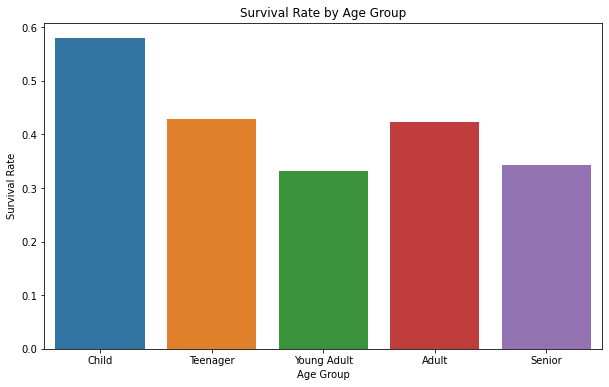

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming your DataFrame df is already defined
bins = [0, 12, 18, 30, 50, 80]
labels = ["Child", "Teenager", "Young Adult", "Adult", "Senior"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))
sns.barplot(x="AgeGroup", y="Survived", data=df, ci=None)  # Use ci=None to disable confidence intervals (error bars)
plt.title("Survival Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.show()


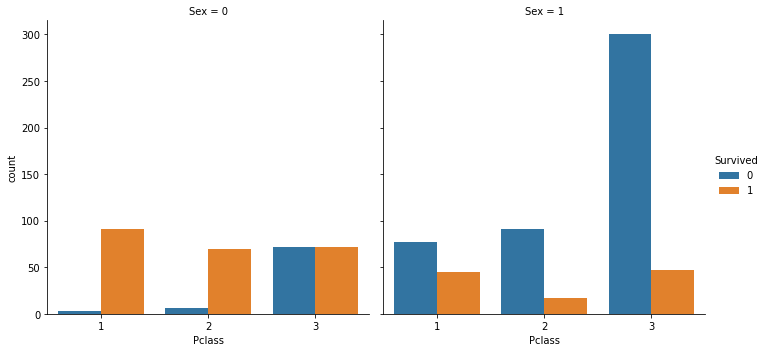

In [171]:
sns.catplot(x="Pclass", hue="Survived", col="Sex", data=df, kind="count")
plt.show()

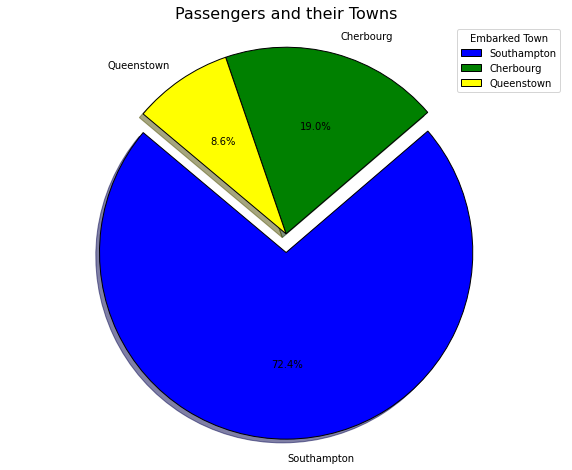

In [172]:
embarked_counts = df["Embarked"].value_counts()
labels = ["Southampton", "Cherbourg", "Queenstown"]
colors = ["blue", "green", "yellow"]
explode = (0.1, 0, 0)

plt.figure(figsize=(10, 8))
plt.pie(
    embarked_counts,
    labels=labels,
    autopct="%1.1f%%",
    colors=colors,
    explode=explode,
    shadow=True,
    startangle=140,
    wedgeprops={"edgecolor": "black"},
)
plt.title("Passengers and their Towns", fontsize=16)
plt.legend(title="Embarked Town", loc="upper right")
plt.axis("equal")
plt.show()

 ## Model Building

In [173]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(x,y)

DecisionTreeClassifier(random_state=0)

In [174]:
y_pred = dt.predict(x)

In [175]:
df1 = pd.DataFrame({"Survived":y,"Survivied Prediction":y_pred})

In [176]:
df1.head(10)

,Survived,Survivied Prediction
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
5,0,0
6,0,0
7,0,0
8,1,1
9,1,1


### Classification Report

In [177]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91       549
           1       0.90      0.78      0.83       342

    accuracy                           0.88       891
   macro avg       0.88      0.86      0.87       891
weighted avg       0.88      0.88      0.88       891



In [178]:
# overall accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.8799102132435466

**Model Evaluation**

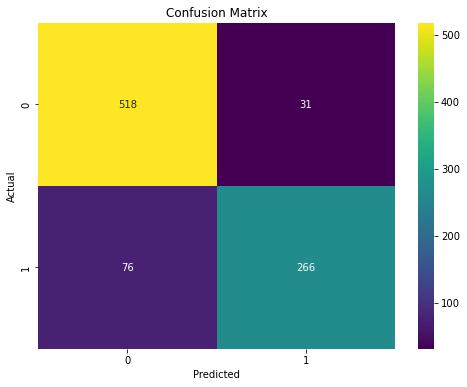

In [179]:
# confusion matrix
from sklearn.metrics import  confusion_matrix
cm = confusion_matrix(y, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='viridis', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()